In [2]:
import pandas as pd
import numpy as np
import pathlib
import os
import shutil

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_pinball_loss,
)

from utils_experiment import (
    load_data,
    get_model_list,
    plot_forecasts_analysis,
    rmse,
    pinball_loss,
    average_pinball_loss,
    plot_quantile_forecast
)

# General data loading for all experiments 

In [3]:
#Identify experiments that are not in the ignore list 
exp_test_description = "Experimental_Analysis"
directory = f"/h/kupfersk/cfpr_2025/generate_forecasts/output/"

ignore_list = [".csv",
               "ipynb",
                "llama",
                "gemini",
                "claude",
                "gpt",
               "Mixtral",
               '5th',
               "restaurants",
               "DeepARModel_exp",
               "ChronosModel_exp",
               "PatchTSTModel_exp",
               "DLinearModel_exp",
               "exp7",
               "exp8",
               "corr",
               "economic",
               "human",
#                "llm",
#                "exp1",
#                "report", 
#                "covariates",
               
]

experiments_include = []

for experiment_name in os.listdir(f"{directory}{'Full_Report'}"):
    if all(keyword not in experiment_name for keyword in ignore_list):
        experiments_include.append(experiment_name)

experiments_include

['ag_local_DeepARModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
 'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
 'ag_local_AutoETSModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_PatchTSTModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
 'ag_global_all_TemporalFusionTransformerModel',
 'ag_local_SimpleFeedForwardModel',
 'ag_local_ChronosModel',
 'ag_global_all_SimpleFeedForwardModel',
 'ag_global_all_DeepARModel',
 'ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_SimpleFeedForwardModel_exp5_climate_',
 'ag_local_AutoARIMAModel',
 'ag_local_SeasonalNaiveModel',
 'ag_local_NaiveModel',
 'ag_local_PatchTSTModel',
 'ag_global_all_TemporalFusionTransformerModel_exp5_m

In [4]:

report_sim_dates = open("../generate_forecasts/experiment_cutoff_dates.txt", 'r').read().split()
# report_sim_dates = report_sim_dates[:-1]

# report_sim_dates= [report_sim_dates[-1]]

target_categories = [
    'Bakery and cereal products (excluding baby food)',
     'Dairy products and eggs',
     'Fish, seafood and other marine products',
     'Food purchased from restaurants',
     'Food',
     'Fruit, fruit preparations and nuts',
     'Meat',
     'Other food products and non-alcoholic beverages',
     'Vegetables and vegetable preparations'
]

target_categories = [f"food_cpi: {col}" for col in target_categories]

start_years = [1986]
random_seed = 42

print("Target Categories:\n" + '\n'.join(target_categories))
print("Report Simulation Dates:\n" + '\n'.join(report_sim_dates))


file_path = "../data/processed_data/all_data_processed.csv"
all_data, foodprice_df, target_categories, all_covariates = load_data(target_categories, file_path)

Target Categories:
food_cpi: Bakery and cereal products (excluding baby food)
food_cpi: Dairy products and eggs
food_cpi: Fish, seafood and other marine products
food_cpi: Food purchased from restaurants
food_cpi: Food
food_cpi: Fruit, fruit preparations and nuts
food_cpi: Meat
food_cpi: Other food products and non-alcoholic beverages
food_cpi: Vegetables and vegetable preparations
Report Simulation Dates:
2018-07-01
2019-07-01
2020-07-01
2021-07-01
2022-07-01
2023-07-01


### Ensure all necessary data is stored in Experimental_Analysis folder for easy access 

In [5]:
# Define the source directory (starting from Full_Report)
source_dir = "../generate_forecasts/output/Full_Report/"
# No need to hard-code the destination directory here; it will be determined dynamically

# Walk through the source directory to find the directories that contain '2024-07-01'
for experiment in os.listdir(source_dir):
    if experiment in experiments_include:
        print(experiment)
        
        for root, dirs, files in os.walk(f"/h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/{experiment}"):
            # Determine the destination directory dynamically by replacing 'Full_Report' with 'Forecasts'
            new_dest = root.replace("Full_Report", "Experimental_Analysis")

            # Ensure the destination directory exists, if not, create it
            os.makedirs(new_dest, exist_ok=True)

            # Move all files from the current 'root' to the new destination directory
            for file in files:
                if '.csv' in file:
                    source_file = os.path.join(root, file)
                    dest_file = os.path.join(new_dest, file)
                    shutil.copy2(source_file, dest_file)  # Use shutil.move() to move files
                    print(f"Moved {source_file} to {dest_file}")


ag_local_DeepARModel
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit prepar

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTr

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedFor

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparati

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations an

ag_global_all_TemporalFusionTransformerModel_exp1_llm_
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2023-07-01/forecasts/food

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Dairy products and eggs.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Dairy products and eggs.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Food pu

### Define evaluation metrics and calculate mape for all periods

In [6]:
# Define the source directory (starting from Full_Report)
source_dir = "../generate_forecasts/output/Experimental_Analysis/"
experiments = experiments_include
experiments

['ag_local_DeepARModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
 'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
 'ag_local_AutoETSModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_PatchTSTModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
 'ag_global_all_TemporalFusionTransformerModel',
 'ag_local_SimpleFeedForwardModel',
 'ag_local_ChronosModel',
 'ag_global_all_SimpleFeedForwardModel',
 'ag_global_all_DeepARModel',
 'ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_SimpleFeedForwardModel_exp5_climate_',
 'ag_local_AutoARIMAModel',
 'ag_local_SeasonalNaiveModel',
 'ag_local_NaiveModel',
 'ag_local_PatchTSTModel',
 'ag_global_all_TemporalFusionTransformerModel_exp5_m

In [7]:
point_metrics = {
    "r2_score": r2_score,
    "mae": mean_absolute_error,
    "mape": mean_absolute_percentage_error,
    "mse": mean_squared_error,
    "rmse": rmse,
}

In [8]:
import json


def compute_all_scores(report_sim_dates, study_metric="mape"):
    global forecast_df
    global actual_df
    global predicted_categories
    
    results = []
    
        
#     # Load the dictionary from the JSON file
#     with open('target_category_dict_filt.json', 'r') as json_file:
#         target_category_dict = json.load(json_file)
        
    for start_year in start_years:
        for EXPERIMENT_NAME in experiments:
            predicted_categories = []
            
            print(EXPERIMENT_NAME)
            if 'ag' in EXPERIMENT_NAME :
                predicted_categories = target_categories
                if "R" not in EXPERIMENT_NAME:
                    if 'exp' in EXPERIMENT_NAME: 
                        general_experiment = f"exp{EXPERIMENT_NAME.split('_exp')[-1]}"
                        predicted_categories_in = target_category_dict[general_experiment]

                        # Drop items containing the word 'restaurant' or exactly 'food_cpi: Food'
                        predicted_categories = [item for item in predicted_categories_in if 'restaurant' not in item.lower() and item != 'food_cpi: Food']


            for category in predicted_categories:
                if "restaurant" in category:
                    continue 
                    
                scores = []

                for cutoff_date in report_sim_dates:

                    forecast_csv_path = f"../generate_forecasts/output/{exp_test_description}/{EXPERIMENT_NAME}/random_seed_{random_seed}/{cutoff_date}/forecasts/{category}.csv"
                    forecast_df = pd.read_csv(forecast_csv_path, index_col=0)
                    forecast_df.index = pd.to_datetime(forecast_df.index)

                    actual_df = foodprice_df[category].loc[
                        [
                            date
                            for date in forecast_df.index
                            if date in foodprice_df.index
                        ]
                    ]
                    
                    if report_sim_dates[-1] == cutoff_date:
                        forecast_df = forecast_df.iloc[:-1]
                        actual_df = actual_df.iloc[:-1]


                    if study_metric in point_metrics:
                        median_col = "q_0.5"
                        y_pred = forecast_df[median_col]
                        y_true = actual_df
                        if len(y_pred) > len(y_true):
                            y_pred = y_pred[: len(y_true)]
                        scores.append(
                            point_metrics[study_metric](y_true=y_true, y_pred=y_pred)
                        )

                    elif study_metric == "pinball_loss":
                        y_pred = forecast_df
                        y_true = actual_df
                        if len(y_pred) > len(y_true):
                            y_pred = y_pred[: len(y_true)]
                        scores.append(
                            average_pinball_loss(
                                y_true=y_true,
                                y_pred_quantiles=y_pred,
                                quantiles=[
                                    0.01,
                                    0.05,
                                    0.1,
                                    0.25,
                                    0.75,
                                    0.9,
                                    0.95,
                                    0.99,
                                ],
                            )
                        )

                mean_score = np.mean(scores)
                std_score = np.std(scores)

                results.append(
                    {   "year": start_year,
                        "experiment": EXPERIMENT_NAME,
                        "category": category,
                        "mean_score": mean_score,
                        "std_score": std_score,
                        "scores": scores
                    }
                )

    return pd.DataFrame(results)


In [9]:
with open('../generate_forecasts/target_category_dict_filt.json', 'r') as json_file:
    target_category_dict = json.load(json_file)
    


In [10]:
## For classical model experiments 
mape_df = compute_all_scores(report_sim_dates, "mape")
mape_df

# mape_df['path']= "f'./output/{exp_test_description}/{EXPERIMENT_NAME}/random_seed_42/{cutoff_date}/forecasts/{category}.csv'"
mape_df.experiment.unique()


ag_local_DeepARModel
ag_global_cpi_with_covariates_TemporalFusionTransformerModel
ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_
ag_local_AutoETSModel
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_
ag_global_all_PatchTSTModel
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_
ag_global_all_TemporalFusionTransformerModel
ag_local_SimpleFeedForwardModel
ag_local_ChronosModel
ag_global_all_SimpleFeedForwardModel
ag_global_all_DeepARModel
ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_
ag_global_all_SimpleFeedForwardModel_exp5_climate_
ag_local_AutoARIMAModel
ag_local_SeasonalNaiveModel
ag_local_NaiveModel
ag_local_PatchTSTModel
ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_
ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_
ag_global_a

array(['ag_local_DeepARModel',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
       'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
       'ag_local_AutoETSModel',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
       'ag_global_all_PatchTSTModel',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
       'ag_global_all_TemporalFusionTransformerModel',
       'ag_local_SimpleFeedForwardModel', 'ag_local_ChronosModel',
       'ag_global_all_SimpleFeedForwardModel',
       'ag_global_all_DeepARModel',
       'ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_',
       'ag_global_all_SimpleFeedForwardModel_exp5_climate_',
       'ag_local_AutoARIMAModel', 'ag_local_SeasonalNaiveModel',
       'ag

In [11]:
mape_df.head(10)

,year,experiment,category,mean_score,std_score,scores
0,1986,ag_local_DeepARModel,food_cpi: Bakery and cereal products (excludin...,0.036713,0.021999,"[0.011036732060852398, 0.019971501010228897, 0..."
1,1986,ag_local_DeepARModel,food_cpi: Dairy products and eggs,0.032611,0.016330,"[0.019867074994984066, 0.027847746093486305, 0..."
2,1986,ag_local_DeepARModel,"food_cpi: Fish, seafood and other marine products",0.022050,0.015371,"[0.010854690989193488, 0.011447317441345844, 0..."
3,1986,ag_local_DeepARModel,food_cpi: Food,0.033385,0.021728,"[0.01192819864460277, 0.015630026544120393, 0...."
4,1986,ag_local_DeepARModel,"food_cpi: Fruit, fruit preparations and nuts",0.038141,0.017945,"[0.02813726903135804, 0.02401235303421688, 0.0..."
5,1986,ag_local_DeepARModel,food_cpi: Meat,0.030732,0.019181,"[0.016607449570504158, 0.06875987246754584, 0...."
6,1986,ag_local_DeepARModel,food_cpi: Other food products and non-alcoholi...,0.040818,0.041998,"[0.008188530204589692, 0.0061233150923951825, ..."
7,1986,ag_local_DeepARModel,food_cpi: Vegetables and vegetable preparations,0.049516,0.024744,"[0.07549552699172918, 0.03886756243120812, 0.0..."
8,1986,ag_global_cpi_with_covariates_TemporalFusionTr...,food_cpi: Bakery and cereal products (excludin...,0.042913,0.036934,"[0.009817147126710592, 0.013938181960307487, 0..."
9,1986,ag_global_cpi_with_covariates_TemporalFusionTr...,food_cpi: Dairy products and eggs,0.028999,0.019073,"[0.00875934005435144, 0.023355599570660315, 0...."


# Figure 3. How much more often did global models end up in the top when we used curated variables


Steps:
1) load in all data
2) Do this for TemporalFusionTransformer
3) Repeat for global all and global+covariates 


In [12]:
def assign_condition(experiment):
    experiment = experiment.lower()  # Make lowercase for case-insensitive matching
    if 'covariates' in experiment:
        return 'covariates'
    elif 'local' in experiment:
        return 'local'
    elif 'global' in experiment:
        return 'global'    
    else:
        return 'all'  # Default to 'all' if none of the keywords are found

# Define the function to assign model class based on keywords in experiment names
def assign_class(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'transformer' in experiment or 'tst' in experiment: 
        return 'Transformer'

    # Check for LLM models (Chronos in this case)
    elif 'chronos' in experiment:
        return 'Foundation'

    # Check for general deep learning models
    elif 'global' in experiment:
        return 'Deep Learning'

    # Check for statistical models
    elif 'autoets' in experiment or 'arima' in experiment or 'naive' in experiment:
        return 'Statistical'

    # Default to 'Deep Learning' if no keywords match
    else:
        return 'Deep Learning'
    
    
def assign_curation(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'exp1' in experiment: 
        return 'Selected by LLM'
    
    # Check for LLM models (Chronos in this case)
    elif 'exp5' in experiment:
        return 'Selected by expert defined categories'
    
    # Check for global models
    elif 'global' in experiment:
        return 'not curated'

    # Check for local models
    elif 'local' in experiment:
        return 'not curated'


    
def assign_model(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'transformer' in experiment:
        return 'TemporalFusionTransformer'
    
    # Check for LLM models (Chronos in this case)
    elif 'tst' in experiment:
        return 'PatchTST'

    # Check for LLM models (Chronos in this case)
    elif 'deepar' in experiment:
        return 'DeepAR'

    # Check for general deep learning models
    elif 'simple' in experiment:
        return 'SimpleFeedForwardNetwork'
    
    # Check for general deep learning models
    elif 'linear' in experiment:
        return 'DLinear'
    
    # Check for general deep learning models
    elif 'chronos' in experiment:
        return 'Chronos'

    # Check for statistical models
    elif 'ets' in experiment:
        return 'Exponential smoothing'
    
    # Check for statistical models
    elif 'arima' in experiment:
        return 'ARIMA'
    
    # Check for statistical models
    elif 'naive' in experiment:
        return 'Naive'

    # Default to 'Deep Learning' if no keywords match
    else:
        return 'Other'

    
# Apply the function to add a new column 'condition' in filt_df
mape_df['condition'] = mape_df['experiment'].apply(assign_condition)
mape_df['class'] = mape_df['experiment'].apply(assign_class)
mape_df['model_name'] = mape_df['experiment'].apply(assign_model)
mape_df['curated'] = mape_df['experiment'].apply(assign_curation)


mape_df['condition'].unique()

array(['local', 'covariates', 'global'], dtype=object)

## Using all data including curation

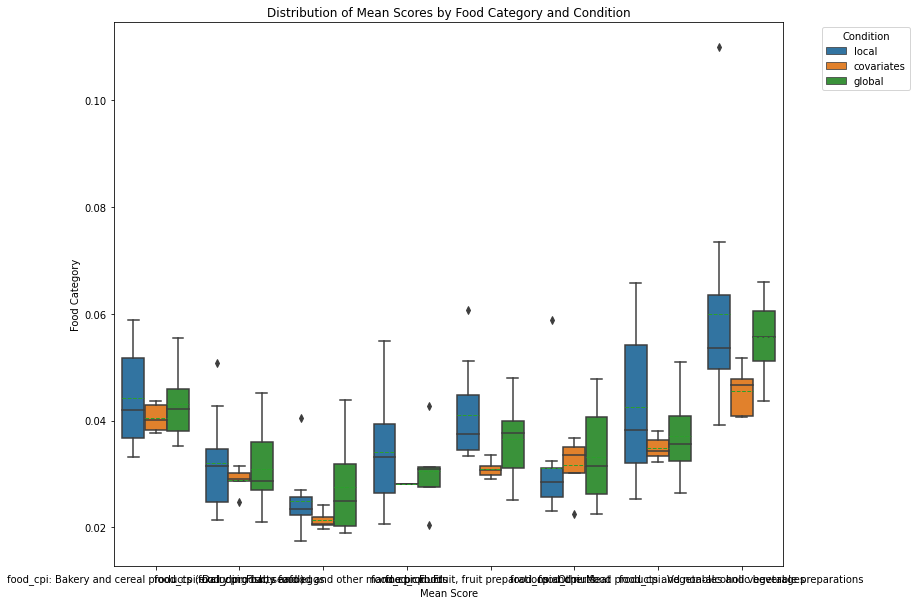

In [16]:

# Set up the plot with category on the y-axis, mean_score on the x-axis, and hue for conditions
plt.figure(figsize=(12, 10))
sns.boxplot(data=mape_df, y='mean_score', x='category', hue='condition', showmeans=True, meanline=True)

# Add plot labels and title
plt.title("Distribution of Mean Scores by Food Category and Condition")
plt.xlabel("Mean Score")
plt.ylabel("Food Category")

# Show plot with legend outside
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()